In [ ]:
# PNG CROP TEST
from PIL import Image
import numpy as np
from matplotlib.pyplot import imshow

im = Image.open(r"recognition/data/temp/blues2.png")

print(im.size)
imshow(np.asarray(im))

In [ ]:
# PNG CROP TEST
# 55, 45 (Top-Left)
# 388, 241 (Bottom-Right)
cropped = im.crop((55, 45, 388, 241))

print(cropped.size)
imshow(np.asarray(cropped))

cropped.save(r"recognition/data/temp/blues2.png")

In [1]:
# TEMPORARY TESTING (IMPORTS)

from recognition import *
from matplotlib import pyplot as plt
from tensorflow.keras.models import load_model
import matplotlib.cm as cm

In [ ]:
## CROP IMAGES 

print("Data already cropped. Don't run again.")
# crop_axes()

In [ ]:
# PROCESS DATA

print("Data already processed. Download from Google Drive if needed.")
# genre_folders()
# split_and_save()
# to_mel_spectrograms
# create_sets()

In [2]:
# CREATE MODEL AND TRAIN 

print("Model created and configured. Training data...")
model, history = train()

Model created and configured. Training data...
Training: blues
Validation: blues
Training: classical
Validation: classical
Training: country
Validation: country
Training: disco
Validation: disco
Training: hiphop
Validation: hiphop
Training: metal
Validation: metal
Training: pop
Validation: pop
Training: reggae
Validation: reggae
Training: rock
Validation: rock
4050
(4050, 128, 216)
[[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]]
4050
(4050, 128, 216)
[[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'tuple'>
Epoch 1/25
41/41 [==============================] - 46s 1s/step - loss: 3.1727 - accuracy: 0.3321 - get_f1: 0.3140 - val_loss: 10.9664 - val_accuracy: 0.1741 - val_get_f1: 0.1656
Epoch 2/25
41/41 [==============================] - 43s 1s/ste

In [3]:
# SAVE NEWLY TRAINED MODEL

print("Saving backup of trained model...")
model.save("recognition/data/model_backup/")

Saving backup of trained model...
INFO:tensorflow:Assets written to: recognition/data/model_backup/assets


In [ ]:
# LOAD IN EXISTING MODEL AND RESPECTIVE HISTORY

print("Loading in model and history...")
model = load_model("recognition/data/model_backup/", custom_objects={'get_f1':get_f1})
history = pickle.load(open('recognition/data/history_backup/history_dict.pkl', "rb"))

Plotting model loss and accuracy...


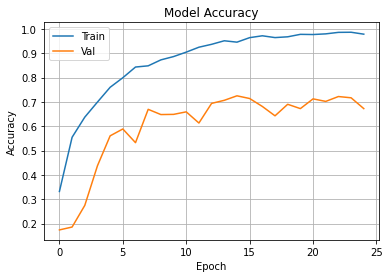

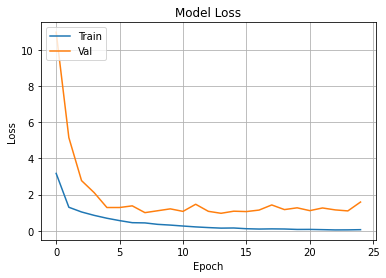

In [4]:
# PLOTTING AFTER CREATING A NEW MODEL

print("Plotting model loss and accuracy...")
# plot accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.grid()
plt.show()
# plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.grid()
plt.show()

In [ ]:
# PLOTTING AFTER LOADING A MODEL

print("Plotting model loss and accuracy...")
# plot accuracy
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()
# plot loss
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [11]:
# TESTING USER QUERY

print("Place the audio files (.wav) you would like to query in the (recognition/data/query) directory.")
# user query
filename = input("What is the name of the audio file you would like to find the genre for? ")
prediction_labels, predictions = process_query(model, filename)

Place the audio files (.wav) you would like to query in the (recognition/data/query) directory.
What is the name of the audio file you would like to find the genre for? Mozart


Plotting detected genre frequencies for this audio file...


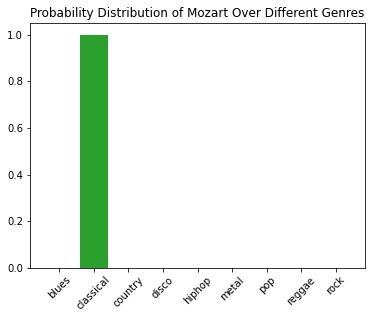

In [12]:
# DISPLAY GENRE RECOGNITION FREQUENCIES

print("Plotting detected genre frequencies for this audio file...")
# indices for color mapping
color_data = [1,2,3,4,5,6,7,8,9]
# use tab10 color mapping (stand out well against white background)
my_cmap = cm.get_cmap('tab10')

# graph setup, including bar sizes
genre_labels = ['blues', 'classical', 'country', 'disco', 'hiphop', 'metal', 'pop', 'reggae', 'rock']
fig, ax= plt.subplots(figsize=(6,4.5))
ax.bar(x=genre_labels, height=predictions, color=my_cmap(color_data))

# makes x-axis genre labels tilted 45 degrees
plt.xticks(rotation=45)
# graph title
ax.set_title(f"Probability Distribution of {filename} Over Different Genres")

# plot graph
plt.show()

Place the audio files (.wav) you would like to query in the (recognition/data/query) directory.
What is the name of the audio file you would like to find the genre for? RickRoll
Plotting detected genre frequencies for this audio file...


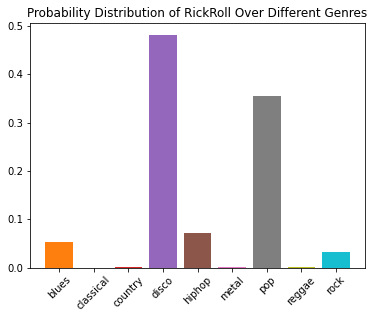

In [22]:
# TESTING USER QUERY

print("Place the audio files (.wav) you would like to query in the (recognition/data/query) directory.")
# user query
filename = input("What is the name of the audio file you would like to find the genre for? ")
prediction_labels, predictions = process_query(model, filename)

# DISPLAY GENRE RECOGNITION FREQUENCIES

print("Plotting detected genre frequencies for this audio file...")
# indices for color mapping
color_data = [1,2,3,4,5,6,7,8,9]
# use tab10 color mapping (stand out well against white background)
my_cmap = cm.get_cmap('tab10')

# graph setup, including bar sizes
genre_labels = ['blues', 'classical', 'country', 'disco', 'hiphop', 'metal', 'pop', 'reggae', 'rock']
fig, ax= plt.subplots(figsize=(6,4.5))
ax.bar(x=genre_labels, height=predictions, color=my_cmap(color_data))

# makes x-axis genre labels tilted 45 degrees
plt.xticks(rotation=45)
# graph title
ax.set_title(f"Probability Distribution of {filename} Over Different Genres")

# plot graph
plt.show()

Place the audio files (.wav) you would like to query in the (recognition/data/query) directory.
What is the name of the audio file you would like to find the genre for? CountryRoads
Plotting detected genre frequencies for this audio file...


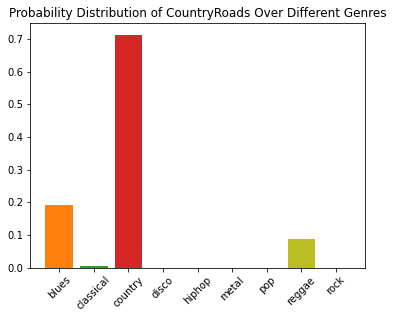

In [14]:
# TESTING USER QUERY

print("Place the audio files (.wav) you would like to query in the (recognition/data/query) directory.")
# user query
filename = input("What is the name of the audio file you would like to find the genre for? ")
prediction_labels, predictions = process_query(model, filename)

# DISPLAY GENRE RECOGNITION FREQUENCIES

print("Plotting detected genre frequencies for this audio file...")
# indices for color mapping
color_data = [1,2,3,4,5,6,7,8,9]
# use tab10 color mapping (stand out well against white background)
my_cmap = cm.get_cmap('tab10')

# graph setup, including bar sizes
genre_labels = ['blues', 'classical', 'country', 'disco', 'hiphop', 'metal', 'pop', 'reggae', 'rock']
fig, ax= plt.subplots(figsize=(6,4.5))
ax.bar(x=genre_labels, height=predictions, color=my_cmap(color_data))

# makes x-axis genre labels tilted 45 degrees
plt.xticks(rotation=45)
# graph title
ax.set_title(f"Probability Distribution of {filename} Over Different Genres")

# plot graph
plt.show()

Place the audio files (.wav) you would like to query in the (recognition/data/query) directory.
What is the name of the audio file you would like to find the genre for? Jazz
Plotting detected genre frequencies for this audio file...


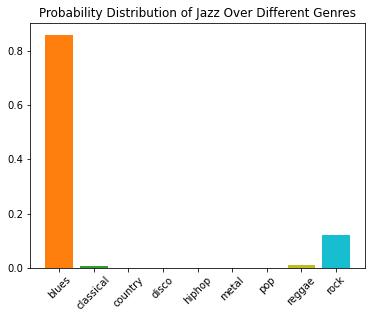

Example: The lack of jazz genre data makes some songs show a higher frequency of blues since the two styles are closely related.


In [17]:
# TESTING USER QUERY

print("Place the audio files (.wav) you would like to query in the (recognition/data/query) directory.")
# user query
filename = input("What is the name of the audio file you would like to find the genre for? ")
prediction_labels, predictions = process_query(model, filename)

# DISPLAY GENRE RECOGNITION FREQUENCIES

print("Plotting detected genre frequencies for this audio file...")
# indices for color mapping
color_data = [1,2,3,4,5,6,7,8,9]
# use tab10 color mapping (stand out well against white background)
my_cmap = cm.get_cmap('tab10')

# graph setup, including bar sizes
genre_labels = ['blues', 'classical', 'country', 'disco', 'hiphop', 'metal', 'pop', 'reggae', 'rock']
fig, ax= plt.subplots(figsize=(6,4.5))
ax.bar(x=genre_labels, height=predictions, color=my_cmap(color_data))

# makes x-axis genre labels tilted 45 degrees
plt.xticks(rotation=45)
# graph title
ax.set_title(f"Probability Distribution of {filename} Over Different Genres")

# plot graph
plt.show()

print("Example: The lack of jazz genre data makes some songs show a higher frequency of blues since the two styles are closely related.")

Place the audio files (.wav) you would like to query in the (recognition/data/query) directory.
What is the name of the audio file you would like to find the genre for? RedRedWine
Plotting detected genre frequencies for this audio file...


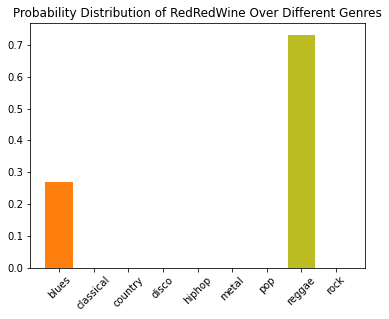

In [26]:
# TESTING USER QUERY

print("Place the audio files (.wav) you would like to query in the (recognition/data/query) directory.")
# user query
filename = input("What is the name of the audio file you would like to find the genre for? ")
prediction_labels, predictions = process_query(model, filename)

# DISPLAY GENRE RECOGNITION FREQUENCIES

print("Plotting detected genre frequencies for this audio file...")
# indices for color mapping
color_data = [1,2,3,4,5,6,7,8,9]
# use tab10 color mapping (stand out well against white background)
my_cmap = cm.get_cmap('tab10')

# graph setup, including bar sizes
genre_labels = ['blues', 'classical', 'country', 'disco', 'hiphop', 'metal', 'pop', 'reggae', 'rock']
fig, ax= plt.subplots(figsize=(6,4.5))
ax.bar(x=genre_labels, height=predictions, color=my_cmap(color_data))

# makes x-axis genre labels tilted 45 degrees
plt.xticks(rotation=45)
# graph title
ax.set_title(f"Probability Distribution of {filename} Over Different Genres")

# plot graph
plt.show()